Import libraries

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import ast
import seaborn as sns

In [2]:
pd.set_option("display.max_columns", None)

Read in dataframe

In [3]:
df = pd.read_csv("franchises_combined_by_year.csv", index_col = 0)

In [4]:
df.sample()

,franchise_name,franchise_id,type,tconst,title,year,is_adult,runtime,genres,votes_average,rating_average,franchise_count,content_per_year,year_diff,vote_diff,rating_diff,num_of_releases_diff,z_rating,z_votes
3336,One Piece: Pirate Warriors,3025-3119,game,tt4426430,One Piece: Pirate Warriors 3,2015,0,NaN,"["" 'Family'"", "" 'Action'"", "" 'Brawler']"", ""['A...",124.0,6.9,3.0,1.0,3.0,16.0,-0.7,0.0,-0.186196,-0.206578


This gets the first and last year of the franchise, creates columns and then gives the relative position of each release in the franchise as a percentage

In [5]:
df = df.groupby('franchise_id').agg(min_year=('year', 'min'), max_year=('year', 'max')) \
       .reset_index() \
       .merge(df, on='franchise_id', how='right') \
       .assign(position_in_franchise=lambda x: (x['year'] - x['min_year']) / (x['max_year'] - x['min_year']) * 100)


This gets the highest and lowest vote of the franchise and creates columns

In [6]:
df = df.groupby('franchise_id').agg(min_vote=('votes_average', 'min'), max_vote=('votes_average', 'max')) \
       .reset_index() \
       .merge(df, on='franchise_id', how='right')


This gets the highest and lowest rating of the franchise and creates columns

In [7]:
df = df.groupby('franchise_id').agg(min_rating=('rating_average', 'min'), max_rating=('rating_average', 'max')) \
       .reset_index() \
       .merge(df, on='franchise_id', how='right')


Find the biggest gap in releases for each franchise

In [8]:
df = df.groupby('franchise_id').agg(biggest_gap_in_releases=('year_diff', 'max')) \
       .reset_index() \
       .merge(df, on='franchise_id', how='left')

In [9]:
df.sample()

,franchise_id,biggest_gap_in_releases,min_rating,max_rating,min_vote,max_vote,min_year,max_year,franchise_name,type,tconst,title,year,is_adult,runtime,genres,votes_average,rating_average,franchise_count,content_per_year,year_diff,vote_diff,rating_diff,num_of_releases_diff,z_rating,z_votes,position_in_franchise
853,3025-1372,1.0,7.2,7.7,516.0,802.0,2004,2010,WWE Smackdown vs. Raw,game,tt0836714,WWE SmackDown vs. RAW 2007,2006,0,NaN,"["" 'Action'"", ""['Sport'"", "" 'Sports']"", "" 'Wre...",802.0,7.6,7.0,1.0,1.0,168.0,0.0,0.0,0.463959,0.080921,33.333333


We can see how long the average franchise runs for:

In [10]:
df[df['franchise_id']=='3025-1372']

,franchise_id,biggest_gap_in_releases,min_rating,max_rating,min_vote,max_vote,min_year,max_year,franchise_name,type,tconst,title,year,is_adult,runtime,genres,votes_average,rating_average,franchise_count,content_per_year,year_diff,vote_diff,rating_diff,num_of_releases_diff,z_rating,z_votes,position_in_franchise
851,3025-1372,1.0,7.2,7.7,516.0,802.0,2004,2010,WWE Smackdown vs. Raw,game,tt0423500,WWE SmackDown! vs. RAW,2004,0,NaN,"["" 'Action'"", ""['Sport'"", "" 'Sports']"", "" 'Wre...",516.0,7.4,7.0,1.0,NaN,NaN,NaN,NaN,0.278200,-0.040354,0.000000
852,3025-1372,1.0,7.2,7.7,516.0,802.0,2004,2010,WWE Smackdown vs. Raw,game,tt0479207,WWE SmackDown! vs. RAW 2006,2005,0,NaN,"["" 'Action'"", ""['Sport'"", "" 'Sports']"", "" 'Wre...",634.0,7.6,7.0,1.0,1.0,118.0,0.2,0.0,0.463959,0.009683,16.666667
853,3025-1372,1.0,7.2,7.7,516.0,802.0,2004,2010,WWE Smackdown vs. Raw,game,tt0836714,WWE SmackDown vs. RAW 2007,2006,0,NaN,"["" 'Action'"", ""['Sport'"", "" 'Sports']"", "" 'Wre...",802.0,7.6,7.0,1.0,1.0,168.0,0.0,0.0,0.463959,0.080921,33.333333
854,3025-1372,1.0,7.2,7.7,516.0,802.0,2004,2010,WWE Smackdown vs. Raw,game,tt1141278,WWE SmackDown vs. RAW 2008,2007,0,NaN,"["" 'Action'"", ""['Sport'"", "" 'Fighting'"", "" 'Wr...",741.0,7.2,7.0,1.0,1.0,-61.0,-0.4,0.0,0.092441,0.055055,50.000000
855,3025-1372,1.0,7.2,7.7,516.0,802.0,2004,2010,WWE Smackdown vs. Raw,game,tt1230589,WWE SmackDown vs. RAW 2009,2008,0,NaN,"["" 'Action'"", ""['Sport'"", "" 'Wrestling']""]",644.0,7.6,7.0,1.0,1.0,-97.0,0.4,0.0,0.463959,0.013923,66.666667
856,3025-1372,1.0,7.2,7.7,516.0,802.0,2004,2010,WWE Smackdown vs. Raw,game,tt1499703,WWE SmackDown vs. RAW 2010,2009,0,NaN,"["" 'Action'"", ""['Sport'"", "" 'Wrestling']""]",592.0,7.6,7.0,1.0,1.0,-52.0,0.0,0.0,0.463959,-0.008127,83.333333
857,3025-1372,1.0,7.2,7.7,516.0,802.0,2004,2010,WWE Smackdown vs. Raw,game,tt1674747,WWE SmackDown vs. RAW 2011,2010,0,NaN,"["" 'Action'"", ""['Sport'"", "" 'Wrestling']"", "" '...",683.0,7.7,7.0,1.0,1.0,91.0,0.1,0.0,0.556838,0.030460,100.000000


[Text(0.5, 1.0, 'Total franchise distribution'),
 Text(0.5, 0, 'Number of releases in the franchise'),
 Text(0, 0.5, 'Total franchises')]

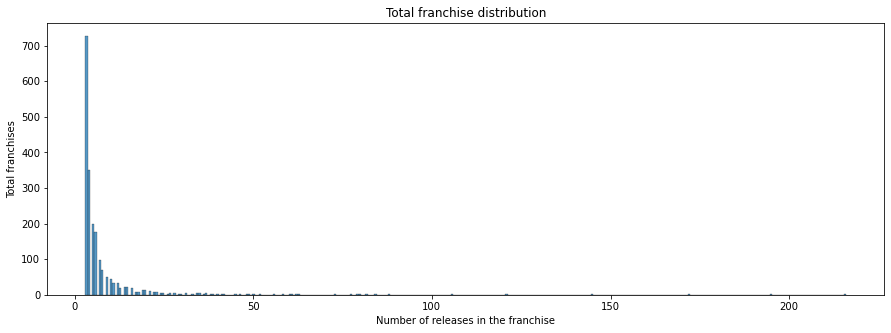

In [12]:
plt.figure(figsize=(15, 5))
sns.histplot(data = df.groupby('franchise_id')['franchise_count'].first().reset_index(), \
             x='franchise_count').set(title = 'Total franchise distribution', xlabel = 'Number of releases in the franchise', ylabel = "Total franchises")

That's pretty unclear so we can divide the data to make it clearer.

[Text(0.5, 1.0, 'Total franchise distribution'),
 Text(0.5, 0, 'Number of releases in the franchise'),
 Text(0, 0.5, 'Total franchises')]

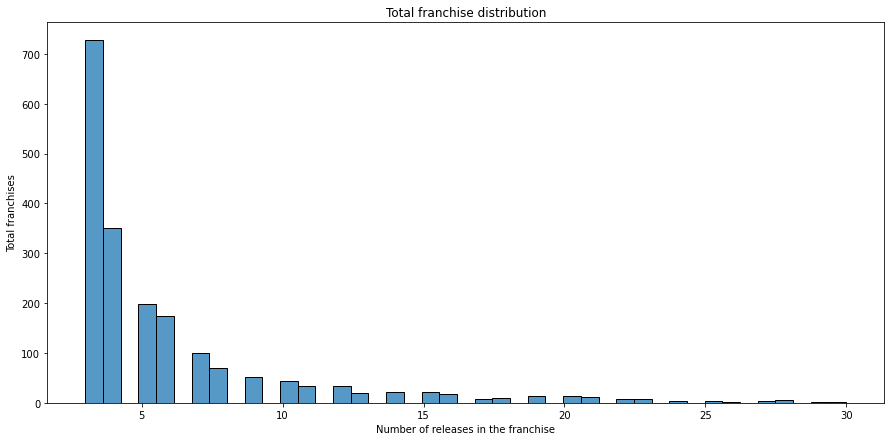

In [13]:
plt.figure(figsize=(15, 7))
sns.histplot(data = df[df['franchise_count'] <= 30].groupby('franchise_id')['franchise_count'].first().reset_index(), \
             x='franchise_count').set(title = 'Total franchise distribution', xlabel = 'Number of releases in the franchise', ylabel = "Total franchises")

We can get a count for the number of franchises in our dataset, and how many of these are games vs movies

In [14]:
print("Unique franchise ids: ", df.franchise_id.nunique(),
      "\nMovie franchises: ", df[df["type"]=="movie"].franchise_id.nunique(), 
      "\nGame franchises: ", df[df["type"]=="game"].franchise_id.nunique())

Unique franchise ids:  2014 
Movie franchises:  857 
Game franchises:  1157


<AxesSubplot:xlabel='year'>

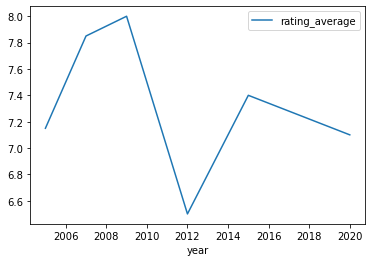

In [15]:
df[df['franchise_id'] == '3025-1403'].plot("year", "rating_average")

<AxesSubplot:xlabel='year', ylabel='rating_diff'>

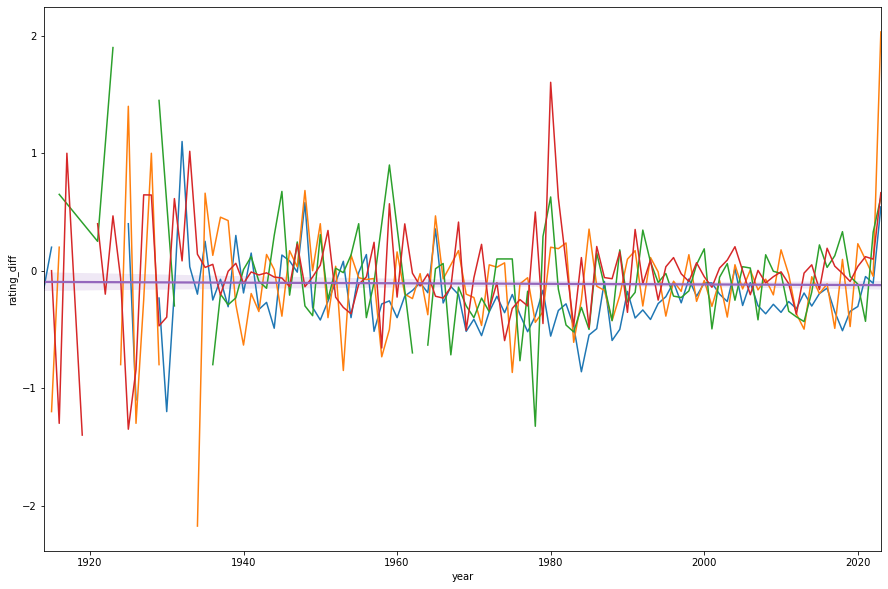

In [16]:
plt.figure(figsize=(15,10))
df[df['franchise_count'] < 6].groupby('year')['rating_diff'].mean().plot(label='Franchise Count = 6')
df[(df['franchise_count'] >= 6) & (df['franchise_count'] < 9)].groupby('year')['rating_diff'].mean().plot(label='Franchise Count = 22')
df[(df['franchise_count'] >= 9) & (df['franchise_count'] < 12)].groupby('year')['rating_diff'].mean().plot(label='Franchise Count = 22')
df[df['franchise_count'] >= 12].groupby('year')['rating_diff'].mean().plot(label='Franchise Count = 22')
sns.regplot(data=df, x='year', y='rating_diff', order=1, scatter=False)

#df[df['franchise_count'] == 8].groupby('year')['rating_diff'].mean().plot(label='Franchise Count = 8')
#df[df['franchise_count'] == 7].groupby('year')['rating_diff'].mean().plot(label='Franchise Count = 7')
#df[df['franchise_count'] == 6].groupby('year')['rating_diff'].mean().plot(label='Franchise Count = 6')
#df[df['franchise_count'] == 5].groupby('year')['rating_diff'].mean().plot(label='Franchise Count = 8')
#df[df['franchise_count'] == 4].groupby('year')['rating_diff'].mean().plot(label='Franchise Count = 7')


Get average rating over time based on franchise size

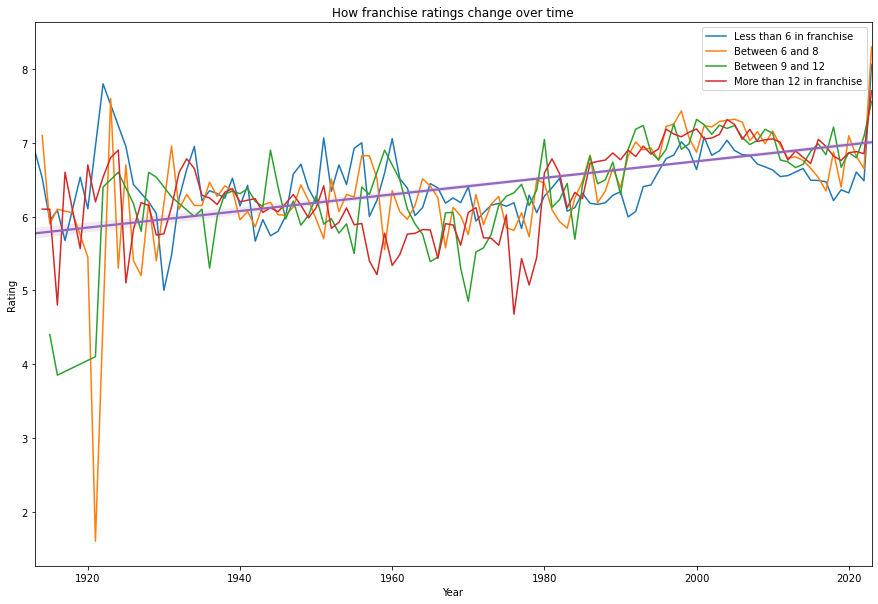

In [21]:
plt.figure(figsize=(15,10))
df[df['franchise_count'] < 6].groupby('year')['rating_average'].mean().plot(label='Less than 6 in franchise')
df[(df['franchise_count'] >= 6) & (df['franchise_count'] < 9)].groupby('year')['rating_average'].mean().plot(label='Between 6 and 8')
df[(df['franchise_count'] >= 9) & (df['franchise_count'] < 13)].groupby('year')['rating_average'].mean().plot(label='Between 9 and 12')
df[df['franchise_count'] >= 13].groupby('year')['rating_average'].mean().plot(label='More than 12 in franchise')
sns.regplot(data=df, x='year', y='rating_average', order=1, scatter=False)
plt.title('How franchise ratings change over time')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.legend()


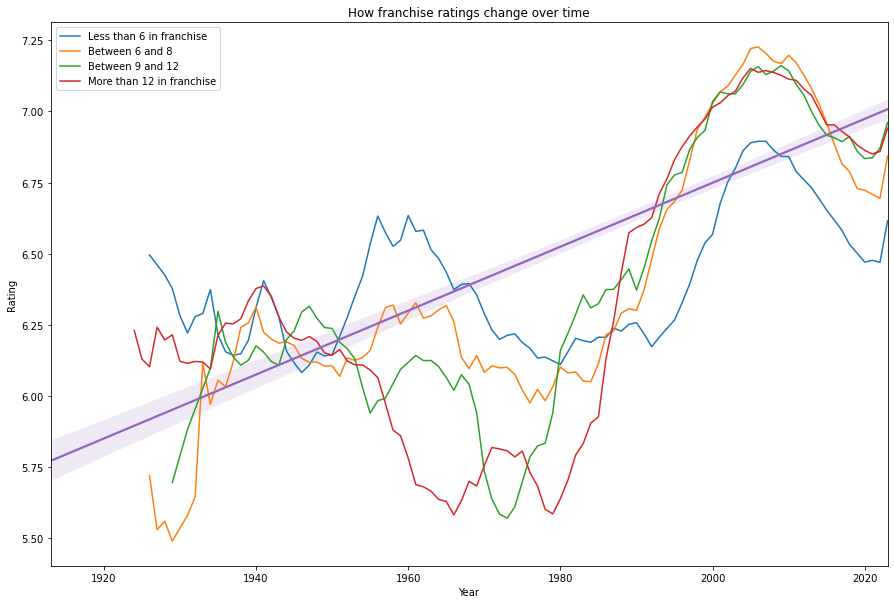

In [38]:
plt.figure(figsize=(15,10))
df[df['franchise_count'] < 6].groupby('year')['rating_average'].mean().rolling(10).mean().plot(label='Less than 6 in franchise')
df[(df['franchise_count'] >= 6) & (df['franchise_count'] < 9)].groupby('year')['rating_average'].mean().rolling(10).mean().plot(label='Between 6 and 8')
df[(df['franchise_count'] >= 9) & (df['franchise_count'] < 13)].groupby('year')['rating_average'].mean().rolling(10).mean().plot(label='Between 9 and 12')
df[df['franchise_count'] >= 13].groupby('year')['rating_average'].mean().rolling(10).mean().plot(label='More than 12 in franchise')
sns.regplot(data=df, x='year', y='rating_average', order=1, scatter=False)
plt.title('How franchise ratings change over time')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.legend()


Split based on movie vs games

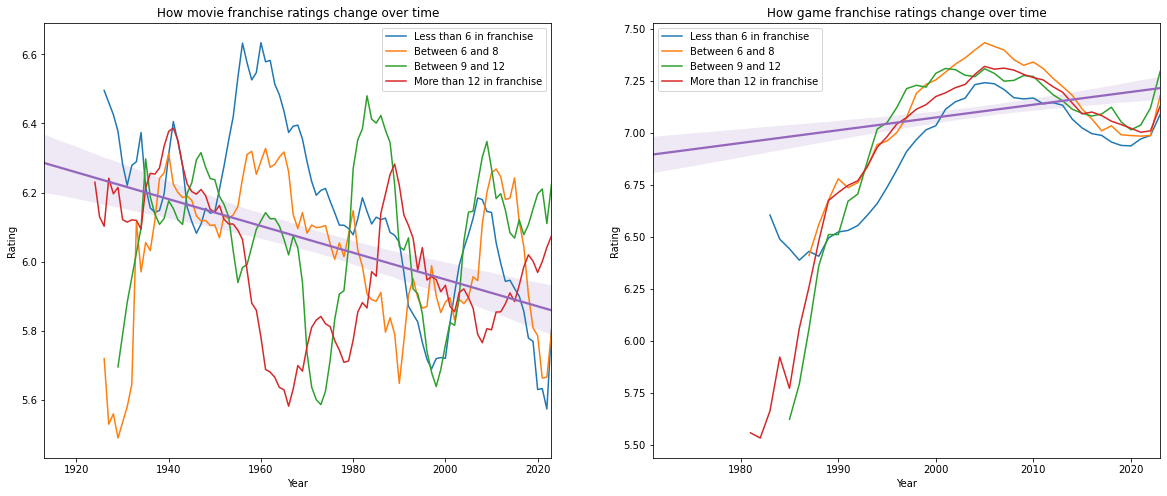

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# plot for movies
movies_df = df[df['type'] == 'movie']
movies_df[movies_df['franchise_count'] < 6].groupby('year')['rating_average'].mean().rolling(10).mean().plot(ax=axs[0], label='Less than 6 in franchise')
movies_df[(movies_df['franchise_count'] >= 6) & (movies_df['franchise_count'] < 9)].groupby('year')['rating_average'].mean().rolling(10).mean().plot(ax=axs[0], label='Between 6 and 8')
movies_df[(movies_df['franchise_count'] >= 9) & (movies_df['franchise_count'] < 13)].groupby('year')['rating_average'].mean().rolling(10).mean().plot(ax=axs[0], label='Between 9 and 12')
movies_df[movies_df['franchise_count'] >= 13].groupby('year')['rating_average'].mean().rolling(10).mean().plot(ax=axs[0], label='More than 12 in franchise')
sns.regplot(data=movies_df, x='year', y='rating_average', order=1, scatter=False, ax=axs[0])
axs[0].set_title('How movie franchise ratings change over time')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Rating')
axs[0].legend()

# plot for games
games_df = df[df['type'] == 'game']
games_df[games_df['franchise_count'] < 6].groupby('year')['rating_average'].mean().rolling(10).mean().plot(ax=axs[1], label='Less than 6 in franchise')
games_df[(games_df['franchise_count'] >= 6) & (games_df['franchise_count'] < 9)].groupby('year')['rating_average'].mean().rolling(10).mean().plot(ax=axs[1], label='Between 6 and 8')
games_df[(games_df['franchise_count'] >= 9) & (games_df['franchise_count'] < 13)].groupby('year')['rating_average'].mean().rolling(10).mean().plot(ax=axs[1], label='Between 9 and 12')
games_df[games_df['franchise_count'] >= 13].groupby('year')['rating_average'].mean().rolling(10).mean().plot(ax=axs[1], label='More than 12 in franchise')
sns.regplot(data=games_df, x='year', y='rating_average', order=1, scatter=False, ax=axs[1])
axs[1].set_title('How game franchise ratings change over time')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Rating')
axs[1].legend()

plt.show()


Get average votes based on franchise size

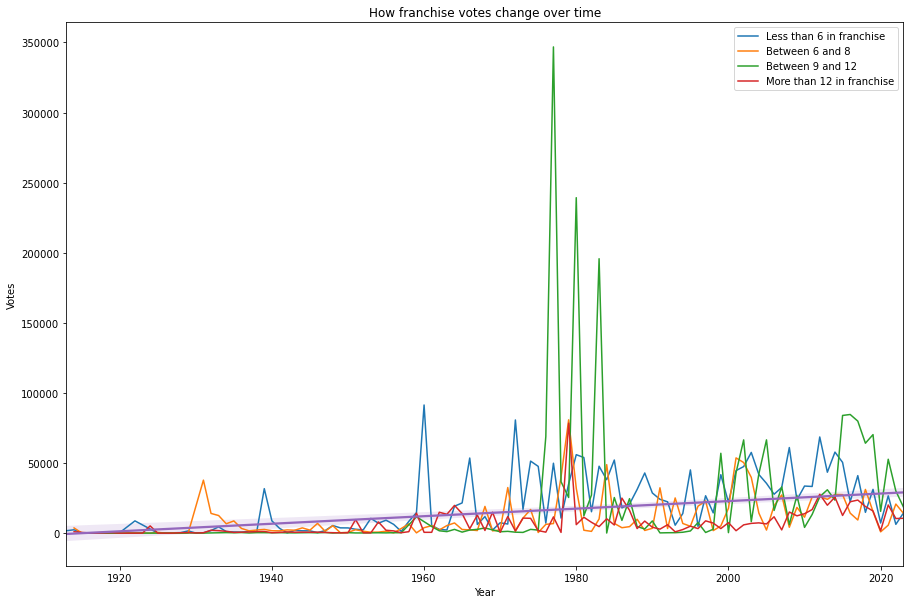

In [37]:
plt.figure(figsize=(15,10))
df[df['franchise_count'] < 6].groupby('year')['votes_average'].mean().plot(label='Less than 6 in franchise')
df[(df['franchise_count'] >= 6) & (df['franchise_count'] < 9)].groupby('year')['votes_average'].mean().plot(label='Between 6 and 8')
df[(df['franchise_count'] >= 9) & (df['franchise_count'] < 13)].groupby('year')['votes_average'].mean().plot(label='Between 9 and 12')
df[df['franchise_count'] >= 13].groupby('year')['votes_average'].mean().plot(label='More than 12 in franchise')
sns.regplot(data=df, x='year', y='votes_average', order=1, scatter=False)
plt.title('How franchise votes change over time')
plt.xlabel('Year')
plt.ylabel('Votes')
plt.legend()


With a rolling mean of 10 years:

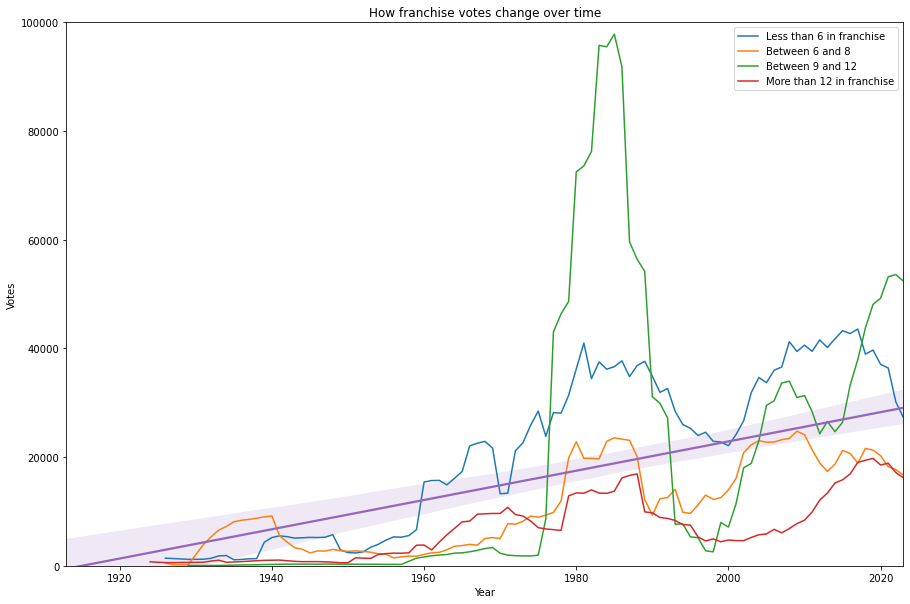

In [35]:
plt.figure(figsize=(15,10))
df[df['franchise_count'] < 6].groupby('year')['votes_average'].mean().rolling(10).mean().plot(label='Less than 6 in franchise')
df[(df['franchise_count'] >= 6) & (df['franchise_count'] < 9)].groupby('year')['votes_average'].mean().rolling(10).mean().plot(label='Between 6 and 8')
df[(df['franchise_count'] >= 9) & (df['franchise_count'] < 13)].groupby('year')['votes_average'].mean().rolling(10).mean().plot(label='Between 9 and 12')
df[df['franchise_count'] >= 13].groupby('year')['votes_average'].mean().rolling(10).mean().plot(label='More than 12 in franchise')
sns.regplot(data=df, x='year', y='votes_average', order=1, scatter=False)
plt.title('How franchise votes change over time')
plt.xlabel('Year')
plt.ylim(0,100000)
plt.ylabel('Votes')
plt.legend()


Split votes into games and movies

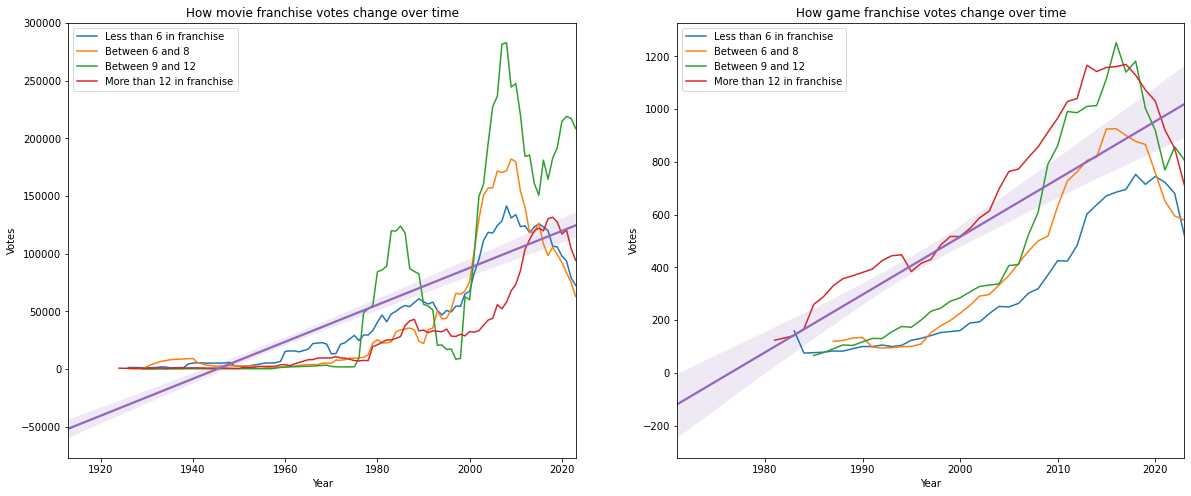

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# plot for movies
movies_df = df[df['type'] == 'movie']
movies_df[movies_df['franchise_count'] < 6].groupby('year')['votes_average'].mean().rolling(10).mean().plot(ax=axs[0], label='Less than 6 in franchise')
movies_df[(movies_df['franchise_count'] >= 6) & (movies_df['franchise_count'] < 9)].groupby('year')['votes_average'].mean().rolling(10).mean().plot(ax=axs[0], label='Between 6 and 8')
movies_df[(movies_df['franchise_count'] >= 9) & (movies_df['franchise_count'] < 13)].groupby('year')['votes_average'].mean().rolling(10).mean().plot(ax=axs[0], label='Between 9 and 12')
movies_df[movies_df['franchise_count'] >= 13].groupby('year')['votes_average'].mean().rolling(10).mean().plot(ax=axs[0], label='More than 12 in franchise')
sns.regplot(data=movies_df, x='year', y='votes_average', order=1, scatter=False, ax=axs[0])
axs[0].set_title('How movie franchise votes change over time')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Votes')
axs[0].legend()

# plot for games
games_df = df[df['type'] == 'game']
games_df[games_df['franchise_count'] < 6].groupby('year')['votes_average'].mean().rolling(10).mean().plot(ax=axs[1], label='Less than 6 in franchise')
games_df[(games_df['franchise_count'] >= 6) & (games_df['franchise_count'] < 9)].groupby('year')['votes_average'].mean().rolling(10).mean().plot(ax=axs[1], label='Between 6 and 8')
games_df[(games_df['franchise_count'] >= 9) & (games_df['franchise_count'] < 13)].groupby('year')['votes_average'].mean().rolling(10).mean().plot(ax=axs[1], label='Between 9 and 12')
games_df[games_df['franchise_count'] >= 13].groupby('year')['votes_average'].mean().rolling(10).mean().plot(ax=axs[1], label='More than 12 in franchise')
sns.regplot(data=games_df, x='year', y='votes_average', order=1, scatter=False, ax=axs[1])
axs[1].set_title('How game franchise votes change over time')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Votes')
axs[1].legend()

plt.show()


In [ ]:
df[(df['type'] == "movie")&(df['franchise_count'] >= 12)].groupby('year')['rating_average'].mean().plot(label='Franchise Count = 22')

In [ ]:
plt.figure(figsize=(15,10))
df[(df['type'] == "movie")&(df['franchise_count'] < 6)].groupby('year')['rating_average'].mean().plot(label='Franchise Count = 6')
df[(df['type'] == "movie")&(df['franchise_count'] >= 6) & (df['franchise_count'] < 9)].groupby('year')['rating_average'].mean().plot(label='Franchise Count = 22')
df[(df['type'] == "movie")&(df['franchise_count'] >= 9) & (df['franchise_count'] < 12)].groupby('year')['rating_average'].mean().plot(label='Franchise Count = 22')
df[(df['type'] == "movie")&(df['franchise_count'] >= 12)].groupby('year')['rating_average'].mean().plot(label='Franchise Count = 22')
sns.regplot(data=df, x='year', y='rating_average', order=1, scatter=False)


In [ ]:
plt.figure(figsize=(15,10))
df[(df['type'] == "game")&(df['franchise_count'] < 6)].groupby('year')['rating_average'].mean().plot(label='Franchise Count < 6')
df[(df['type'] == "game")&(df['franchise_count'] >= 6) & (df['franchise_count'] < 9)].groupby('year')['rating_average'].mean().plot(label='Franchise Count < 9')
df[(df['type'] == "game")&(df['franchise_count'] >= 9) & (df['franchise_count'] < 12)].groupby('year')['rating_average'].mean().plot(label='Franchise Count < 12')
df[(df['type'] == "game")&(df['franchise_count'] >= 12)].groupby('year')['rating_average'].mean().plot(label='Franchise Count > 12')
sns.regplot(data=(df[df['type'] == "game"]), x='year', y='rating_average', order=1, scatter=False)
plt.legend()

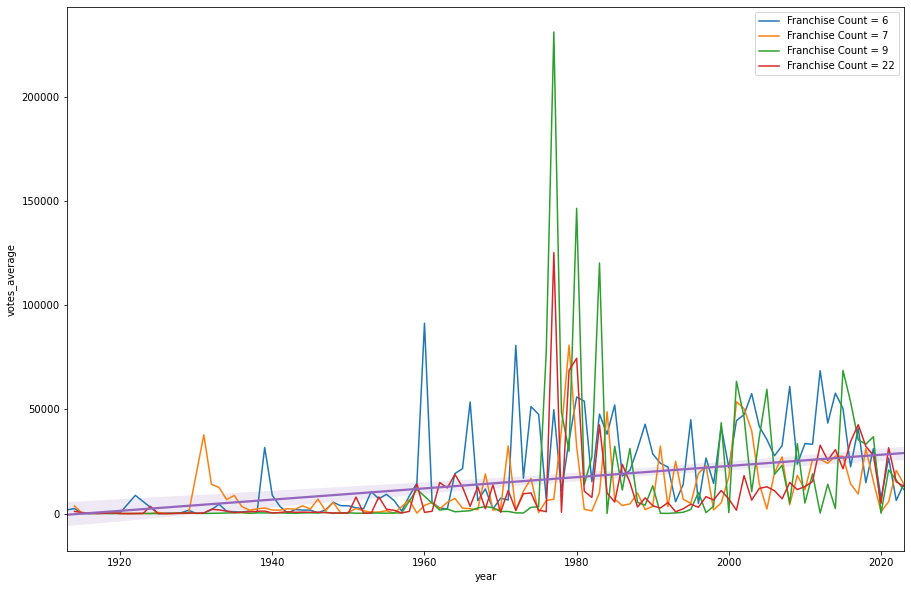

In [22]:
plt.figure(figsize=(15,10))
df[df['franchise_count'] < 6].groupby('year')['votes_average'].mean().plot(label='Franchise Count = 6')
df[(df['franchise_count'] >= 6) & (df['franchise_count'] < 9)].groupby('year')['votes_average'].mean().plot(label='Franchise Count = 7')
df[(df['franchise_count'] >= 9) & (df['franchise_count'] < 12)].groupby('year')['votes_average'].mean().plot(label='Franchise Count = 9')
df[df['franchise_count'] >= 12].groupby('year')['votes_average'].mean().plot(label='Franchise Count = 22')
sns.regplot(data=df, x='year', y='votes_average', order=1, scatter=False)
plt.legend()

Create Barry's graph

Text(0.5, 1.0, 'Games')

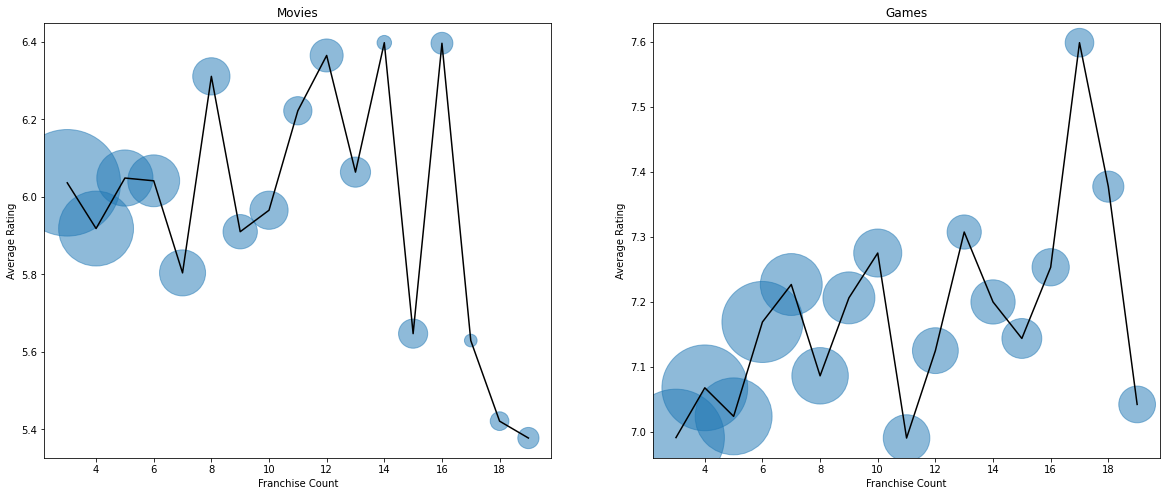

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

movies_df = df[df['type'] == 'movie']
games_df = df[df['type'] == 'game']

movies_grouped = movies_df[movies_df['franchise_count']< 20].groupby('franchise_count')
games_grouped = games_df[games_df['franchise_count']< 20].groupby('franchise_count')

# plot scatter points and connect with line for movies
x = movies_grouped['franchise_count'].mean()
y = movies_grouped['rating_average'].mean()
s = movies_grouped['franchise_count'].count() * 10
axs[0].scatter(x, y, s=s, alpha=0.5)
axs[0].plot(x, y, linestyle='-', color='black')

# plot scatter points and connect with line for games
x = games_grouped['franchise_count'].mean()
y = games_grouped['rating_average'].mean()
s = games_grouped['franchise_count'].count() * 10
axs[1].scatter(x, y, s=s, alpha=0.5)
axs[1].plot(x, y, linestyle='-', color='black')

# add labels and titles
axs[0].set_xlabel('Franchise Count')
axs[0].set_ylabel('Average Rating')
axs[0].set_title('Movies')
axs[1].set_xlabel('Franchise Count')
axs[1].set_ylabel('Average Rating')
axs[1].set_title('Games')


(6.0, 8.0)

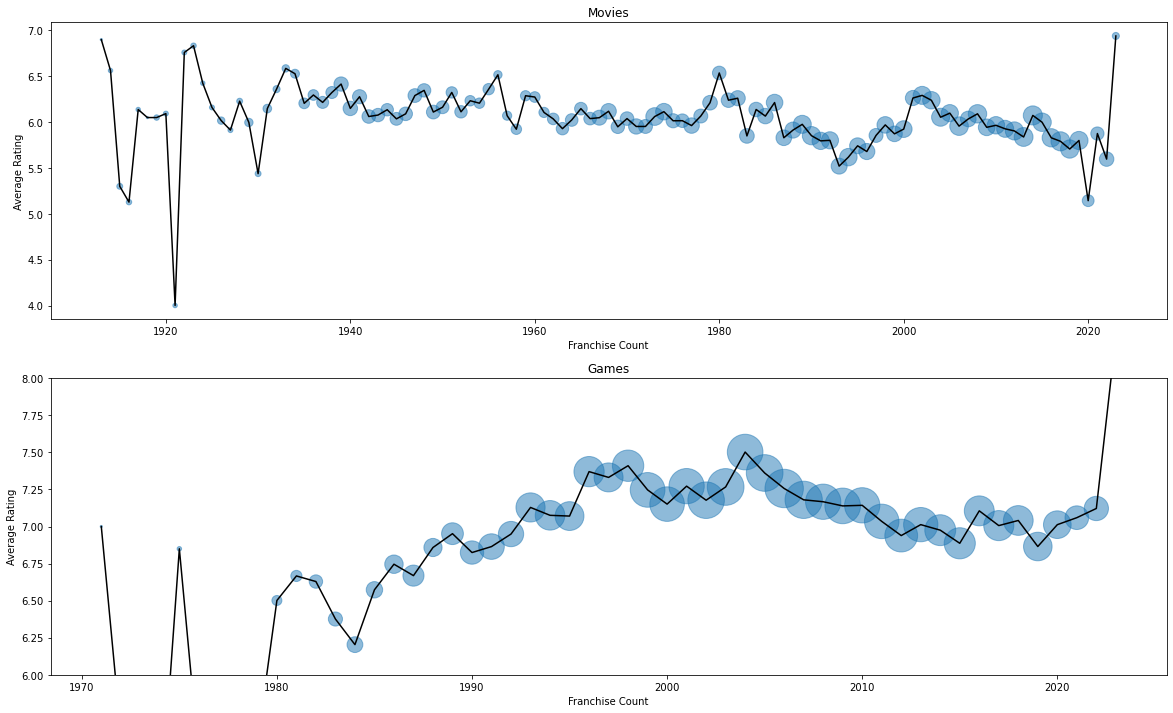

In [38]:
# CREATE BARRY'S GRAPH
fig, axs = plt.subplots(2, 1, figsize=(20, 12))

#movies_df = df[df['type'] == 'movie']
#games_df = df[df['type'] == 'game']
#movies_grouped = movies_df[movies_df['franchise_count']< 20].groupby('year')
#games_grouped = games_df[games_df['franchise_count']< 20].groupby('year')

movies_grouped = df[df['type'] == 'movie'].groupby('year')
games_grouped = df[df['type'] == 'game'].groupby('year')

# plot scatter points and connect with line for movies
x = movies_grouped['year'].mean()
y = movies_grouped['rating_average'].mean()
s = movies_grouped['franchise_count'].count() * 5
axs[0].scatter(x, y, s=s, alpha=0.5)
axs[0].plot(x, y, linestyle='-', color='black')

# plot scatter points and connect with line for games
x = games_grouped['year'].mean()
y = games_grouped['rating_average'].mean()
s = games_grouped['franchise_count'].count() * 5
axs[1].scatter(x, y, s=s, alpha=0.5)
axs[1].plot(x, y, linestyle='-', color='black')

# add labels and titles
axs[0].set_xlabel('Franchise Count')
axs[0].set_ylabel('Average Rating')
axs[0].set_title('Movies')
axs[1].set_xlabel('Franchise Count')
axs[1].set_ylabel('Average Rating')
axs[1].set_title('Games')
axs[1].set_ylim(6, 8)


In [ ]:
df.plot.scatter("biggest_gap_in_releases", "rating_average", figsize = (15,10))

In [ ]:
df.sample()

In [ ]:
df.plot.scatter("position_in_franchise", "votes_average", c=df['type'].map({'movie': 'green', 'game': 'red'}), alpha = 0.5, figsize = (15,10))
plt.yscale('log', base=10)

In [ ]:
df.plot.scatter("position_in_franchise", "rating_average", figsize = (15,10))

In [ ]:
df.sample()

In [ ]:
fig, ax = plt.subplots()
ax.boxplot([df[df['type'] == 'movie']['rating_average'], df[df['type'] == "game"]['rating_average']])
ax.set_xticklabels(['Movie', 'Game'])
ax.set_ylabel('Average Rating')
ax.set_title('Standard Deviation of Average Rating')
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.boxplot([df[df['type'] == 'movie']['votes_average'], df[df['type'] == "game"]['votes_average']])
ax.set_xticklabels(['Movie', 'Game'])
ax.set_ylabel('Number of Votes')
ax.set_title('Standard Deviation of Number of Votes')
plt.show()

In [ ]:
df[df['type'] == "game"]['votes_average'].describe()

In [ ]:
df[df['type'] == "movie"]['votes_average'].describe()

We can look at the number of releases each franchise has

In [ ]:
bins =[2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 12.5, 15.5, 20.5, 250]
df['franchise_count_bin'] = pd.cut(df['franchise_count'], bins=bins, labels=["3", "4", "5", "6", "7", "8", "9", "10-12", "13-15", "16-20", "20+"])

In [ ]:
df.groupby('franchise_id')['franchise_count_bin'].first().value_counts().reset_index().plot(
    kind='bar', x='index', y='franchise_count_bin', xlabel = "Number of releases", ylabel = "Number of franchises", legend=False)

## Note:

This is taking me too long. All I want to do is sort the bins so they go in order but it's taking too long to try to figure out so I'll come back to it

Now I want to see whether the average rating for a franchise as a whole is affected by the number of elements in the franchise. I was going to just get an average based on the grouped years, but have realised that this will result in skewed data. Because we have already got an average for the year, we potentially have changed the weighting of certain movies, so if we try to get an average when we have already averaged some of them, it's going to create problems. Therefore I need to instead use the dataframe where the years were not merged.

In [13]:
df_unmerged = pd.read_csv("franchises_complete_dataframe.csv", index_col = 0)
df_unmerged.tconst.count()

D:\Programs\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,2,7,14,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


307375

In [14]:
df_unmerged.sample()

,franchise_name,franchise_id,tconst,title,year,is_adult,runtime,genres,rating,votes,type,game_id,best_fit_ratio,developers,platforms,publishers,age_rating,franchise_count
262792,NaN,NaN,tt6018036,hide the monster,2016.0,0,79,['Horror'],6.0,330.0,movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_unmerged = df_unmerged.groupby('franchise_id').agg(average_vote_franchise=('votes', 'mean'), average_rating_franchise=('rating', 'mean')) \
       .reset_index() \
       .merge(df_unmerged, on='franchise_id', how='right')

In [16]:
df_unmerged = df_unmerged.groupby('franchise_id').agg(min_year=('year', 'min'), max_year=('year', 'max')) \
       .reset_index() \
       .merge(df_unmerged, on='franchise_id', how='right') \
       .assign(position_in_franchise=lambda x: (x['year'] - x['min_year']) / (x['max_year'] - x['min_year']) * 100)


In [17]:
df_unmerged["Vote_relative_to_franchise_average"] = df_unmerged.apply(lambda row: (row["votes"] / row["average_vote_franchise"]) * 100, axis=1)

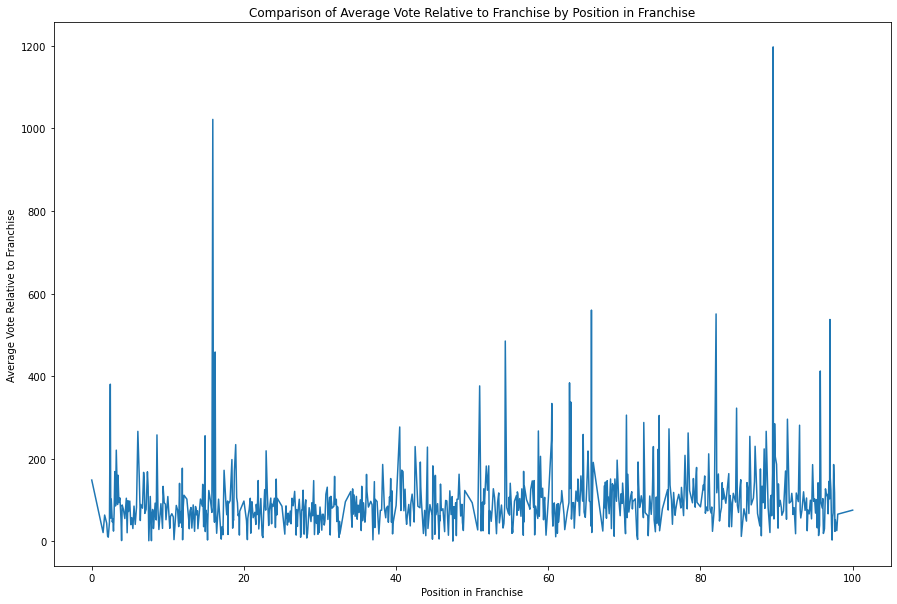

In [18]:
df_unmerged.groupby('position_in_franchise')['Vote_relative_to_franchise_average'].mean().plot(kind='line', figsize=(15,10))
plt.xlabel('Position in Franchise')
plt.ylabel('Average Vote Relative to Franchise')
plt.title('Comparison of Average Vote Relative to Franchise by Position in Franchise')
plt.show()

<AxesSubplot:xlabel='position_in_franchise', ylabel='Vote_relative_to_franchise_average'>

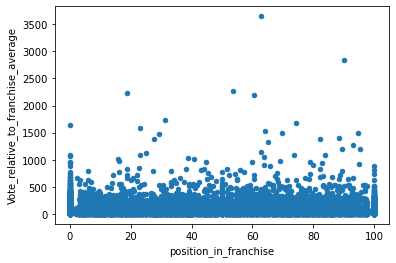

In [19]:
df_unmerged.plot.scatter("position_in_franchise", "Vote_relative_to_franchise_average")

## NEW DATAFRAME
Create a new dataframe with 1 entry per franchise. 

In [20]:
new_df = df_unmerged.sort_values('year').groupby('franchise_id').agg({
    'franchise_name' : 'first',
    'type': 'first',
    'rating': 'mean',
    'votes': 'mean',
    'franchise_count': 'first',
    'year': ['first', 'last']
})

In [21]:
new_df.sample()

franchise_name   type rating  votes franchise_count    year  \
                      first  first   mean   mean           first   first   
franchise_id                                                               
f444                Pom Pom  movie   5.95  137.5             4.0  1984.0   

                      
                last  
franchise_id          
f444          1986.0

In [ ]:
new_df[new_df['franchise_count'] == 25]

In [22]:
def split_year(row):
    row['first_year'] = int(row['year']['first'])
    row['last_year'] = int(row['year']['last'])
    return row

new_df = new_df.apply(split_year, axis=1)
new_df = new_df[['franchise_name', 'type', 'rating', 'votes', 'franchise_count', 'first_year', 'last_year']]


In [23]:
new_df["franchise_length"] = new_df.apply(lambda row: row["last_year"] - row["first_year"] +1, axis = 1)

In [24]:
new_df.columns = new_df.columns.get_level_values(0)

In [25]:
new_df["franchise_length"].describe()


count    1989.000000
mean       14.551533
std        10.896346
min         1.000000
25%         6.000000
50%        11.000000
75%        21.000000
max        75.000000
Name: franchise_length, dtype: float64

In [26]:
new_df["frequency_of_releases"] = new_df.apply(lambda row: row["franchise_count"] / row["franchise_length"], axis = 1)

In [27]:
new_df[new_df['type']== 'game'].frequency_of_releases.describe()

count    1157.000000
mean        0.613475
std         0.506560
min         0.069767
25%         0.300000
50%         0.500000
75%         0.750000
max         5.000000
Name: frequency_of_releases, dtype: float64

In [28]:
new_df[new_df['type']== 'movie'].frequency_of_releases.describe()

count    832.000000
mean       0.736336
std        0.857758
min        0.040000
25%        0.272727
50%        0.444444
75%        0.857143
max        6.000000
Name: frequency_of_releases, dtype: float64

<AxesSubplot:xlabel='last_year', ylabel='frequency_of_releases'>

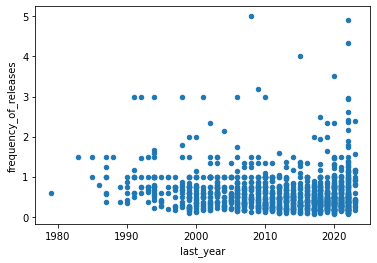

In [29]:
new_df[new_df['type']== 'game'].plot.scatter("last_year", "frequency_of_releases")

<AxesSubplot:xlabel='first_year', ylabel='frequency_of_releases'>

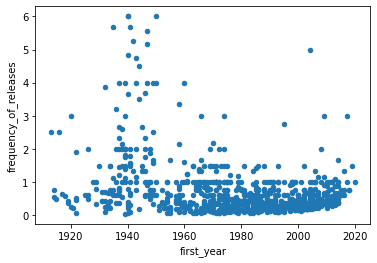

In [30]:
new_df[new_df['type']== 'movie'].plot.scatter("first_year", "frequency_of_releases")

In [32]:
new_df["average_year_gap_per_release"] = new_df.apply(lambda row: row["franchise_length"] / row["franchise_count"], axis = 1)

<AxesSubplot:xlabel='average_year_gap_per_release', ylabel='franchise_count'>

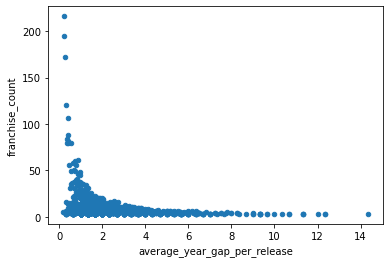

In [35]:
new_df[new_df['type']== 'game'].plot.scatter("average_year_gap_per_release", "franchise_count")

In [34]:
new_df["average_year_gap_per_release"].describe()

count    1989.000000
mean        2.724709
std         2.274971
min         0.166667
25%         1.300000
50%         2.000000
75%         3.384615
max        25.000000
Name: average_year_gap_per_release, dtype: float64

In [ ]:
new_df.frequency_of_releases.describe()

In [1]:
new_df[(new_df['frequency_of_releases']) & (new_df["type"] == "movie")].plot.scatter("frequency_of_releases", 'rating')

NameError: name 'new_df' is not defined

In [ ]:
new_df.sort_values('franchise_length')

KeyError: 'frequency'

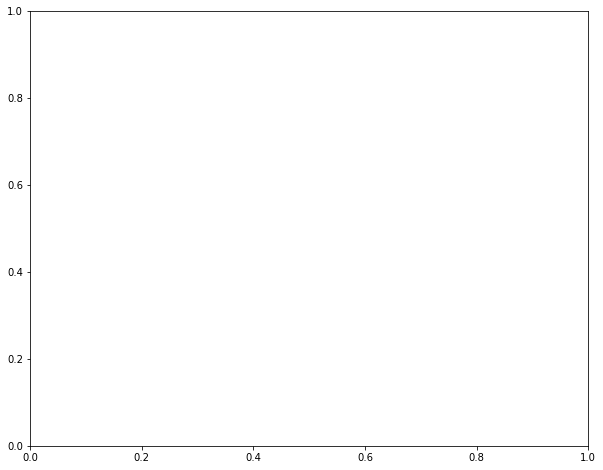

In [36]:
fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(
    x=new_df["franchise_length"],
    y=new_df["frequency"],
    c=new_df["rating"],
    cmap="coolwarm",
    alpha=0.7
)

# Add axis labels and a colorbar
ax.set_xlabel("Franchise Length (Years)")
ax.set_ylabel("Frequency")
cbar = fig.colorbar(scatter)
cbar.set_label("Rating")

plt.show()

In [ ]:
new_df[new_df['frequency_of_releases']>= 1].sort_values('frequency_of_releases', ascending = False).head(20)

In [ ]:
df

Now I have this, I can get the average rating and number of votes for each franchise, based on the number of elements in that franchise.

In [ ]:
bins =[2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 12.5, 15.5, 20.5, 250]
new_df['franchise_count_bin'] = pd.cut(new_df['franchise_count'],bins=bins, labels=["3", "4", "5", "6", "7", "8", "9", "10", "11-12", "13-15", "16-20", "21+"])

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
new_df['franchise_count'].value_counts().sort_index().plot(title = "Number of elements in each franchise", xlabel = "Number of elements in franchise",ylabel = "Franchise count")
ax.set_xscale("log")

In [ ]:
new_df['franchise_count_bin'].value_counts().sort_index().plot(title = "Number of elements in each franchise", xlabel = "Number of elements in franchise",ylabel = "Number of franchises")

In [40]:
bins =[2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 12.5, 15.5, 20.5, 250]
new_df['min_franchise_count'] = pd.cut(new_df['franchise_count'],bins=bins, labels=["3", "4", "5", "6", "7", "8", "9", "10", "11", "13", "16", "21"])

In [41]:
new_df['min_franchise_count'] = new_df['min_franchise_count'].apply(lambda x: int(x))

In [42]:
new_df.sort_values('min_franchise_count')

,franchise_name,type,rating,votes,franchise_count,first_year,last_year,franchise_length,frequency_of_releases,average_year_gap_per_release,min_franchise_count
franchise_id,,,,,,,,,,,
3025-960,Street Fighter Alpha,game,7.533333,457.333333,3.0,1995,1998,4,0.750000,1.333333,3
f1184,Samurai Trilogy (Yoji Yamada),movie,7.833333,11850.666667,3.0,2002,2006,5,0.600000,1.666667,3
f916,The Flesh Trilogy,movie,5.100000,268.000000,3.0,1967,1968,2,1.500000,0.666667,3
3025-2872,Tecmo World Cup,game,5.700000,19.000000,3.0,1986,1989,4,0.750000,1.333333,3
f915,Flash Gordon (serials),movie,6.900000,1656.666667,3.0,1936,1940,5,0.600000,1.666667,3
...,...,...,...,...,...,...,...,...,...,...,...
3025-576,Spider-Man,game,6.954286,1611.914286,35.0,1982,2020,39,0.897436,1.114286,21
3025-556,Tom Clancy,game,7.177500,837.775000,40.0,1991,2022,32,1.250000,0.800000,21
3025-551,Star Wars,game,7.176415,1081.386792,106.0,1979,2022,44,2.409091,0.415094,21


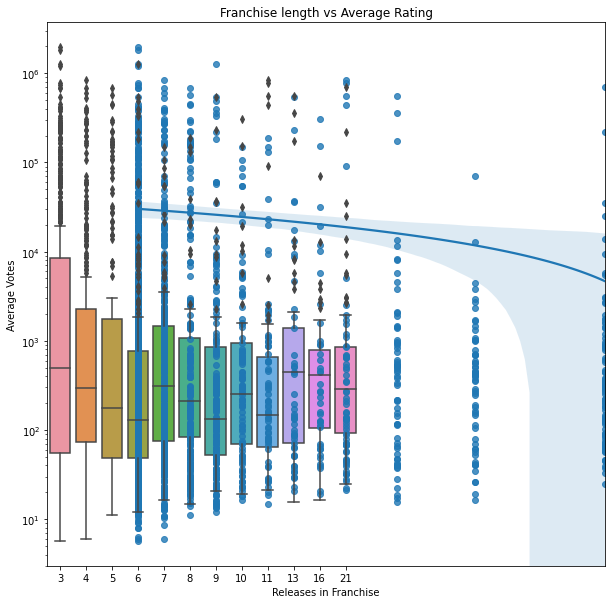

In [47]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(x="min_franchise_count", y="votes", data=new_df, ax=ax)
sns.regplot(x="min_franchise_count", y="votes", data=new_df, ax=ax)
#new_df.boxplot(by = "franchise_count_bin", column = ["rating"], ax = ax)
ax.set_yscale('log')
ax.set_title("Franchise length vs Average Rating")
ax.set_xlabel("Releases in Franchise")

ax.set_ylabel("Average Votes")
plt.show()

In [ ]:
new_df.sample()

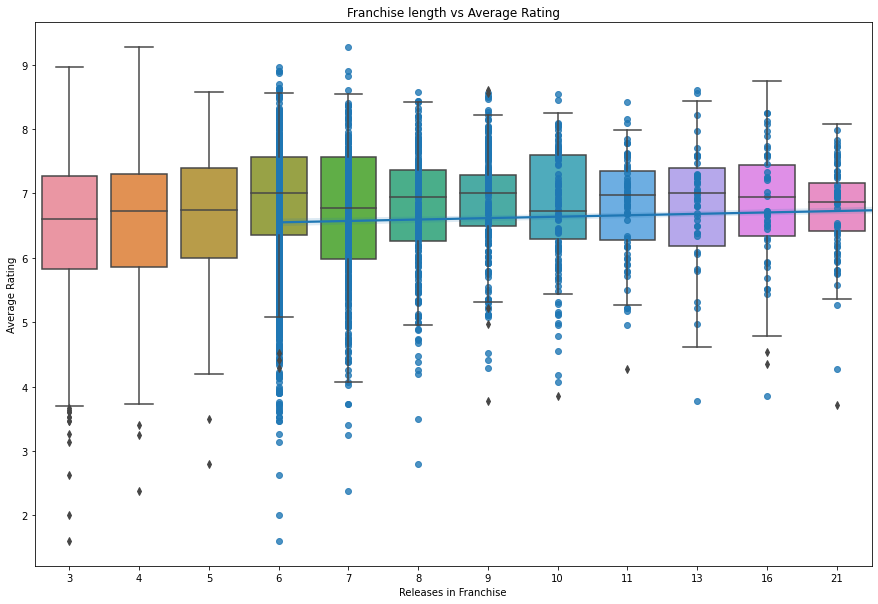

In [44]:
fig, ax = plt.subplots(figsize=(15,10))
sns.regplot(x="min_franchise_count", y="rating", data=new_df, ax=ax)
sns.boxplot(x="min_franchise_count", y="rating", data=new_df, ax=ax)

#new_df.boxplot(by = "franchise_count_bin", column = ["rating"], ax = ax)
#ax.set_yscale('log')
ax.set_title("Franchise length vs Average Rating")
ax.set_xlabel("Releases in Franchise")
ax.set_ylabel("Average Rating")
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
new_df[new_df["type"]=="game"].boxplot(by = "franchise_count_bin", column = ["rating"], ax = ax)
#ax.set_yscale('log')
ax.set_title("Game Franchise length vs Average Rating")
ax.set_xlabel("Releases in Franchise")
ax.set_ylabel("Average Rating")
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
new_df[new_df["type"]=="movie"].boxplot(by = "franchise_count_bin", column = ["rating"], ax = ax)
#ax.set_yscale('log')
ax.set_title("Movie Franchise length vs Average Rating")
ax.set_xlabel("Releases in Franchise")
ax.set_ylabel("Average Rating")
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
new_df.boxplot(by = "franchise_count_bin", column = ["votes"], ax = ax)
ax.set_yscale('log')
ax.set_title("Franchise length vs Average Number of Votes")
ax.set_xlabel("Releases in Franchise")
ax.set_ylabel("Average Number of Votes")
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
new_df[new_df["type"]=="game"].boxplot(by = "franchise_count_bin", column = ["votes"], ax = ax)
ax.set_yscale('log')
ax.set_title("Game franchise length vs Average Number of Votes")
ax.set_xlabel("Releases in Franchise")
ax.set_ylabel("Average Number of Votes")
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
new_df[new_df["type"]=="movie"].boxplot(by = "franchise_count_bin", column = ["votes"], ax = ax)
ax.set_yscale('log')
ax.set_title("Movie Franchise length vs Average Number of Votes")
ax.set_xlabel("Releases in Franchise")
ax.set_ylabel("Average Number of Votes")
plt.show()

In [ ]:
new_df.boxplot(by = "franchise_count_bin", column = ["votes"], rot = 90, figsize=(10,10))

In [ ]:
df.sample()

In [ ]:
# Merge the mean ratings back into the original DataFrame
df_unmerged = pd.merge(df_unmerged, df_unmerged.groupby("franchise_id")["rating"].mean().reset_index(), on="franchise_id", suffixes=("", "_franchise_overall"))

# Rename the new column to "franchise_overall_rating"
#df_unmerged = df_unmerged.rename(columns={"rating_mean": "franchise_overall_rating"})


#df_unmerged["franchise_overall_rating"] = df_unmerged.groupby("franchise_id")["rating"].mean()

In [ ]:
df_unmerged.groupby('franchise_id')['rating_franchise_overall'].first().value_counts().sort_index()

In [ ]:
#bins =[1, 2.01, 3.01, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 12.5, 15.5, 20.5, 250]
df_unmerged['overall_franchise_rating_bins'] = pd.cut(df_unmerged['rating_franchise_overall'], bins=10)

In [ ]:
df_unmerged.groupby('franchise_id')['overall_franchise_rating_bins'].first().value_counts().sort_index().plot(
    kind='bar', x='index', y='rating_franchise_overall', xlabel = "Number of releases", ylabel = "Number of franchises", legend=False)

In [ ]:
df[df["type"]=="game"].franchise_id.nunique()

In [ ]:
df[df["type"]=="game"].franchise_count_bins.value_counts()

In [ ]:
df[df["type"]=="game"].boxplot(by = "franchise_count_bins", column = ["rating_average"], rot = 90, figsize=(10,10))

In [ ]:
df.plot.bar(x = df.rating_average)

In [ ]:
df.loc[df["type"] == "movie", 'z_rating'] = stats.zscore(df.loc[df["type"] == "movie", 'rating_average'])
df.loc[df["type"] == "game", 'z_rating'] = stats.zscore(df.loc[df["type"] == "game", 'rating_average'])
df.loc[df["type"] == "movie", 'z_votes'] = stats.zscore(df.loc[df["type"] == "movie", 'votes_average'])
df.loc[df["type"] == "game", 'z_votes'] = stats.zscore(df.loc[df["type"] == "game", 'votes_average'])

In [ ]:
df

Getting an overall picture of our data:

In [ ]:
df[df["type"] == "game"].votes_average.describe()

In [ ]:
df[df["type"] == "movie"].votes_average.describe()

In [ ]:
df.rating_average.describe()

In [ ]:
#df.groupby("type").year_diff.boxplot(rot = 90)
#df.groupby("type")[["year_diff"]].boxplot(rot=90)
df.groupby("type").plot(kind="box", rot=90)
